# Human in the loop - model retraining

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, tree

from IPython.display import clear_output

Current number of datapoints: 45


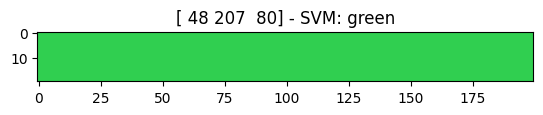

{'purple': 1, 'magenta': 5, 'blure': 1, 'yellow': 2, 'cyan': 1, 'gray': 3, 'blue': 13, 'green': 13, 'orange': 1, 'red': 4, 'brown': 1}


In [23]:
DATASET_PATH = "colors_dataset.txt"

while True:
    clear_output(wait=True)
    
    with open(DATASET_PATH, "r") as fh:
        data = fh.read().split("\n")

    datapoints = [p.split(",") for p in data if p]
    training_codes = [p[0].split(" ") for p in datapoints]
    training_labels = [p[1].replace(" ", "") for p in datapoints]
    print(f"Current number of datapoints: {len(datapoints)}")

    unique_labels = set(training_labels)
    unique_labels = {label: training_labels.count(label) for label in set(training_labels)}
    
    
    clf_svm = svm.SVC()
    clf_svm.fit(training_codes, training_labels)
    
    code = np.random.randint(0, 255, 3)
    label = clf_svm.predict([code,])[0]
    
    image = (np.ones((20, 200, 3)) * code).astype("uint8")
    plt.imshow(image)
    plt.title(f"{code} - SVM: {label}")
    plt.show()
    
    print(unique_labels)
    choice = input()
    if choice:
        with open(DATASET_PATH, "a") as fh:
            fh.write(f"{code[0]} {code[1]} {code[2]}, {choice}\n")
    else:
        break

    
